In [1]:
## Run this cell when using google colab

# from google.colab import files
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
 
# #For saving to Google Drive
# from google.colab import drive
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# Gdrive = GoogleDrive(gauth)
 
# drive.mount('/content/drive',force_remount=True)

# Delta-X Applications Workshop #
### This project is funded by JPL under contract with NASA.
### The NASA Delta-X project is funded by the Science Mission Directorate’s Earth Science Division through the Earth Venture Suborbital-3 Program NNH17ZDA001N-EVS3.
### © 2022 California Institute of Technology. Government sponsorship acknowledged.

#### Jupyter notebooks presented and prepared by:
Talib Oliver-Cabrera, NASA Jet Propulsion Laboratory
(talib.oliver.cabrera@jpl.nasa.gov)

#### Dataset Autors:
- Cathleen Jones, NASA Jet Propulsion Laboratory
- Marc Simard, NASA Jet Propulsion Laboratory
- Yunling Lou, NASA Jet Propulsion Laboratory
- Talib Oliver-Cabrera, NASA Jet Propulsion Laboratory

#### Dataset Citation:
Jones, C., T. Oliver-cabrera, M. Simard, and Y. Lou. 2022. Delta-X: UAVSAR Level 3 Geocoded InSAR Derived Water Level Changes, LA,USA, 2021. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/2058

## Introduction

NASA’s Delta-X mission seeks to understand the processes controlling soil accretion and retention in deltas.

Soil accretion is influenced by 1) local organic soil accumulation and 2) how much sediment comes in from outside the delta, where the water flow within the delta carries the sediment, and how the vegetation limits and slows the water flow.

 <p align="left">
  <img width="400" src="images/sediments.png">
</p>     
<p style="text-align: center;">
    (Soil movement through wetlands; source Delta-X mission, JPL)
</p>

Competing influences of vegetation:
- Slows the water flow so that more sediment  is deposited within the delta.
- Dense vegetation can prevent water from flowing into the interior of the islands.

To understand sediment movement and deposition, it is necessary to study water level changes throughout the wetlands and their channels. However, capturing water level changes within wetlands it’s a difficult task. Wetland environments are difficult to access, limiting gauge installation to open water regions. Also, even though tide gauges provide high-temporal resolution data, their coverage in space is very limited. Additionally, current tide-gauge coverage is sparse and located in open water segments, not really providing information of water flow in the wetlands. 

 <p align="left">
  <img width="600" src="images/gauges.png">
</p>     
<p style="text-align: center;">
    (Water level in situ measurements, we can observe examples of gauge stations available from the coastwide reference Monitoring System (CRMS) as well as the NOAA stations in the maps; source Delta-X mission, JPL)
</p>

Delta-X uses InSAR acquired by UAVSAR (Uninhabited Aerial Vehicle Synthetic Aperture Radar) to improve water level change observations over wetland regions that allow double bounce scattering of the radar pulses between water and vegetation. UAVSAR's L-band radar measures the network of small channels that carry water into the wetlands, at the water level changes, and how that water changes over time in areas of vegetation.

 <p align="left">
  <img width="400" src="images/uavsar.jpg">
</p>     
<p style="text-align: center;">
    (Uninhabited Aerial Vehicle Synthetic Aperture Radar (UAVSAR); source deltax.jpl.nasa.gov)
</p>

## Radar interferometry (InSAR)
Synthetic Aperture Radar (SAR) is a type of radar, generally mounted on a space or airborne platform. This system uses the platform flying path to simulate a very large antenna and produce high-resolution images. Interferometric synthetic aperture radar (InSAR) is a remote sensing technique that uses the difference of phase return between to SAR acquisitions taken over a same location in different time periods. Since SAR sensors are often mounted in satellite platforms, the InSAR technique is commonly used to observe changes in the Earth’s surface (Bürgmann et al., 20000; Hansen et al., 2001; Rosen et al., 2000). 
    
 <p align="left">
  <img width="600" src="images/insar.png">
</p>     
<p style="text-align: center;">
    (Illustration explaining InSAR; source volcano.si.edu)
</p>

InSAR is widely used to observe geophysical and environmental phenomena. In wetland environments, it can provide spatially extensive water level change measurements by taking advantage of the double-bounce scattering of the radar pulses with the water surface and emergent vegetation. It can be used as a monitoring tool to observe and characterize water level change and patterns across wetlands, spatially complementing water level gauge information.

 <p align="left">
  <img width="600" src="images/double_bounce_liao2020.png">
</p>     
<p style="text-align: center;">
    (Double bounce scattering illustration; source Liao et al., 2020)
</p>


The technique is dependent on the double-bounce scattering provided by wetland emergent vegetation. Thus, the approach is highly sensitive to surface changes in water or vegetation that lead to loss of interferometric coherence.

 <p align="left">
  <img width="300" src="images/insar_lu2008.png">
</p>     
<p style="text-align: center;">
    (Wetland InSAR example, source; Lu et al., 2008)
</p>

Delta-X takes advantage of the rapid-repeat acquisitions from the Uninhabited Aerial Vehicle Synthetic Aperture Radar UAVSAR (L-band) to generate interferometric products to provide spatially extensive water level change measurements within areas with emergent vegetation. 

 <p align="left">
  <img width="900" src="images/uavsar_insar.png">
</p>     
<p style="text-align: center;">
    (Delta-X UAVSAR InSAR, source; Oliver Cabrera JPL)
</p>


## Exploring L3 InSAR water level change products ##
In this notebook we take a look at the Level 3 UAVSAR InSAR derived water level change from the Delta-X campaign. 

To access the data please visit ORNL DAAC https://daac.ornl.gov/
    
 <p align="left">
  <img width="600" src="images/ornldaac_main.png">
</p>     
<p style="text-align: center;">
    (ORNL main page)
</p>

    Lvel 3 water level changes and other data can be downloaded after creating an account and login in.
    
 <p align="left">
  <img width="600" src="images/ornldaac_login.png">
</p>     
<p style="text-align: center;">
    (ORNL login)
</p>  
    
    If you dont have an account, go ahead and register.
    
 <p align="left">
  <img width="600" src="images/ornldaac_register.png">
</p>     
<p style="text-align: center;">
    (ORNL registration)
</p> 
    
    After registering and loging in the data can be accessed.
    Delta-X: UAVSAR Level 3 Geocoded InSAR Derived Water Level Changes, can be found at
    https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=2058
    
 <p align="left">
  <img width="600" src="images/ornl_l3.png">
</p>     
<p style="text-align: center;">
    (L3 Water level change data)
</p>

    The map below shows the spatial coverage of each UAVSAR flight line acquired during the Delta-X campaign.  Map shows the Atchafalaya and Terrebone Basins along the southern coast of Louisiana, USA.
    
 <p align="left">
  <img width="600" src="images/uavsar_datacover.png">
</p>     
<p style="text-align: center;">
    (UAVSAR data coverage)
</p>

    Select the desired data click the download botton next to the name or add to the cart. 
    
 <p align="left">
  <img width="600" src="images/l3data1.png"> <img width="600" src="images/l3data2.png">
</p>     
<p style="text-align: center;">
    (Data download)
</p>
  
    After adding the desired data to the cart, the summary will look similar to the following example. 
    
 <p align="left">
  <img width="600" src="images/l3_checkout.png">
</p>     
<p style="text-align: center;">
    (Data checkout)
</p>

    You will recevie an email letting you know that the download is ready, it will include a download link and will also provide the alternative to use wget. 
    
 <p align="left">
  <img width="600" src="images/l3download_email.png">
</p>     
<p style="text-align: center;">
    (Download email)
</p>


### L3 Data Characteristics
#### Data aplication and derivation
The UAVSAR interferometric products serve as maps of surface change throughout the wetland regions. This data is used to produce water level change time series measurements that are used to evaluate and compare hydrodynamic model performance.

#### Data information

- Spatial Coverage:  Atchafalaya River and Terrebonne Basins in southern Louisiana
- Spatial Resolution:  0.000063 degrees (approximately 6m)
- Temporal Coverage:  2021-03-27 to 2021-04-18 and 2021-09-05 to 2021-09-13
- Temporal Resolution: estimates at 30-minute intervals
- InSAR deriver water level change units: meters
- File naming convention:
    - Water level change naming convention: ssssss_IIIII_YYLLDDHHMM_yyllddhhmm_vv_waterlevelchange.grd.dat
    - Temporal coherence naming convention: ssssss_IIIII_YYLLDD_vv_temporalcoherence.grd.dat

| Field | Content |
| :-: | :- |
| ssssss | 6-character alphanumeric site name assigned to the UAVSAR flight line |
| IIIII | 5-character flight line ID assigned to the UAVSAR flight line. The first 3 characters are the aircraft heading in degrees from North, values 000-359, and the last 2 characters are an alphanumeric counter chosen to ensure uniqueness of the ID. |
| YYLLDDHHMM | UTC time of the start of Acq. #1, encoded as: |
|            | YY  =  the last two digits of the year |
|            | LL  =  month (1-12) |
|            | DD  =  day of month |
|            | HH  =  hour (0-24) |
|            | MM  =  minute |
| yyllddhhmm | UTC time of the start of Acq. #2, encoded as: |
|            | yy  =  the last two digits of the year |
|            | ll  =  month (1-12) |
|            | dd  =  day of month |
|            | hh  =  hour (0-24) |
|            | mm  =  minute |
| ext | File extension indicating the file type: |
| | grd.dat|

### For this example we explore the L3 InSAR derived water level change time steps
    1. Initialize the notebook using the necessary libraries. 
    2. Read rasters.
    3. Inspect InSAR time steps.
    4. Inspect temporal coherence.
    5. Mask InSAR time steps using temporal coherence.
    6. Generate InSAR water level profile.
    7. Extract InSAR data sample using a window search. 

### 1. Initialize the notebook using the necessary libraries.

In [2]:
## 1. Initialize the notebook using the necessary libraries
import os
import glob
from datetime import datetime, date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import gdal

### 2. Read rasters.

In [3]:
## 2. Read rasters 

#### define work directory for use in google colab ####
# work_dir = '/content/drive/MyDrive/DeltaX_Workshop_2022/Tutorials/3_UAVSAR/data'

#### define local work directory if running in personal computer ####
work_dir = '/Users/cabrera/Documents/Projects/Deltax/open_data_workshop/data' 

os.chdir(work_dir)
print('Go to directory:', work_dir)
# Verify data contents
print('Contents of the data folder below:')
!ls 


Go to directory: /Users/cabrera/Documents/Projects/Deltax/open_data_workshop/data
Contents of the data folder below:
uavsar_l1  uavsar_l1b uavsar_l2  uavsar_l3


In [4]:
## Inspect the UAVSAR L3 data direcotry using colab 
print('Take a look at the water level change image files:')
!ls uavsar_l3/


Take a look at the water level change image files:
wterre_34202_2104061728_2104061728_01_waterlevelchange.grd.dat
wterre_34202_2104061728_2104061728_01_waterlevelchange.grd.dat.hdr
wterre_34202_2104061728_2104061800_01_waterlevelchange.grd.dat
wterre_34202_2104061728_2104061800_01_waterlevelchange.grd.dat.hdr
wterre_34202_2104061728_2104061831_01_waterlevelchange.grd.dat
wterre_34202_2104061728_2104061831_01_waterlevelchange.grd.dat.hdr
wterre_34202_2104061728_2104061902_01_waterlevelchange.grd.dat
wterre_34202_2104061728_2104061902_01_waterlevelchange.grd.dat.hdr
wterre_34202_2104061728_2104062032_01_waterlevelchange.grd.dat
wterre_34202_2104061728_2104062032_01_waterlevelchange.grd.dat.hdr
wterre_34202_2104061728_2104062102_01_waterlevelchange.grd.dat
wterre_34202_2104061728_2104062102_01_waterlevelchange.grd.dat.hdr
wterre_34202_210406_01_temporalcoherence.grd.dat
wterre_34202_210406_01_temporalcoherence.grd.dat.hdr


In [5]:
# Get the path to the images and use it to read the information of one of the images.
image_files = os.path.join(work_dir,'uavsar_l3')
print(os.path.expanduser(image_files))

/Users/cabrera/Documents/Projects/Deltax/open_data_workshop/data/uavsar_l3


In [6]:
# take a look at data info usign gdal
print('Use GDAL to take a look at the details from one image:')
!gdalinfo uavsar_l3/wterre_34202_2104061728_2104061728_01_waterlevelchange.grd.dat


Use GDAL to take a look at the details from one image:
Driver: ENVI/ENVI .hdr Labelled
Files: uavsar_l3/wterre_34202_2104061728_2104061728_01_waterlevelchange.grd.dat
       uavsar_l3/wterre_34202_2104061728_2104061728_01_waterlevelchange.grd.dat.hdr
Size is 8008, 12732
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
Origin = (-91.351797674899998,29.779911028899999)
Pixel Size = (0.000055560000000,-0.000055560000000)
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( -91.3517977,  29.7799110) ( 91d21' 6.47"W, 29d46'47.68"N)
Lower Left  ( -91.3517977,  29.0725211) ( 91d21' 6.47"W, 29d 4'21.08"N)
Upper Right ( -90.9068732,  29.7799110) ( 90d54'24.74"W, 29d46'47.68"N)

### 2.1 Extract the datetime from the file names

In [7]:
## As part of reading the rasters we want to extract the datetime from the file names
## In this cell we read all InSAR time steps file names and create a dt_list = date time list

# Define a work directory in this case is our deltax l3 data dir
path_2_images = os.path.expanduser(os.path.expanduser(image_files))
# create a list of image names without the full path of the file
img_list = glob.glob(path_2_images+'/*waterlevelchange*.dat')
print('Below is the list of image file names:')
print(img_list)


Below is the list of image file names:
['/Users/cabrera/Documents/Projects/Deltax/open_data_workshop/data/uavsar_l3/wterre_34202_2104061728_2104061902_01_waterlevelchange.grd.dat', '/Users/cabrera/Documents/Projects/Deltax/open_data_workshop/data/uavsar_l3/wterre_34202_2104061728_2104062102_01_waterlevelchange.grd.dat', '/Users/cabrera/Documents/Projects/Deltax/open_data_workshop/data/uavsar_l3/wterre_34202_2104061728_2104061800_01_waterlevelchange.grd.dat', '/Users/cabrera/Documents/Projects/Deltax/open_data_workshop/data/uavsar_l3/wterre_34202_2104061728_2104061728_01_waterlevelchange.grd.dat', '/Users/cabrera/Documents/Projects/Deltax/open_data_workshop/data/uavsar_l3/wterre_34202_2104061728_2104062032_01_waterlevelchange.grd.dat', '/Users/cabrera/Documents/Projects/Deltax/open_data_workshop/data/uavsar_l3/wterre_34202_2104061728_2104061831_01_waterlevelchange.grd.dat']


In [8]:
## Now we should separate the date-time from the file name.
## we can test in one file name before applying to the rest. 

# Print a single name
print('Single file name:')
print(img_list[0])
print('------------------------------') # separator for visual aid

# Separate the file name from the path
print('Isolated name:')
print(os.path.basename(img_list[0]))

Single file name:
/Users/cabrera/Documents/Projects/Deltax/open_data_workshop/data/uavsar_l3/wterre_34202_2104061728_2104061902_01_waterlevelchange.grd.dat
------------------------------
Isolated name:
wterre_34202_2104061728_2104061902_01_waterlevelchange.grd.dat


In [9]:
## Separate the date from the full name
print((os.path.basename(img_list[0])).split('_')[3]) 


2104061902


In [10]:
## Change format from text into datetime
## For more on date time formating go to the following link https://docs.python.org/3/library/datetime.html

print(datetime.strptime(((os.path.basename(img_list[0])).split('_')[3]), '%y%m%d%H%M'))


2021-04-06 19:02:00


In [11]:
## Now apply all steps above for the whole file names

# We loop over the file name list
dt_list = []
for img in img_list:
    dt = datetime.strptime(((os.path.basename(img)).split('_')[3]), '%y%m%d%H%M')
    dt_list.append(dt)
dt_list.sort() # Sort dates
print(dt_list)

[datetime.datetime(2021, 4, 6, 17, 28), datetime.datetime(2021, 4, 6, 18, 0), datetime.datetime(2021, 4, 6, 18, 31), datetime.datetime(2021, 4, 6, 19, 2), datetime.datetime(2021, 4, 6, 20, 32), datetime.datetime(2021, 4, 6, 21, 2)]


### 2.2 Read rasters using GDAL

In [12]:
## We can first read a single image using gdal.
## Lets start with the temporal coherence raster

tcoh_path = os.path.join(path_2_images, 'wterre_34202_210406_01_temporalcoherence.grd.dat')
ds = gdal.Open(tcoh_path, gdal.GA_ReadOnly)
tcoh = ds.GetRasterBand(1).ReadAsArray()

# Print info from the data we are reading
# Description
print('Description ', ds.GetDescription())
print('------------------------------') # separator for visual aid
# Projection
print('Projection ', ds.GetProjection())
print('------------------------------') # separator for visual aid
# Dimensions
print('Dimensions x,y ', ds.RasterXSize, ds.RasterYSize)
print('------------------------------') # separator for visual aid
# Number of bands
print('Bands ', ds.RasterCount)
# Geo info
print('Geo info', ds.GetGeoTransform())



Description  /Users/cabrera/Documents/Projects/Deltax/open_data_workshop/data/uavsar_l3/wterre_34202_210406_01_temporalcoherence.grd.dat
------------------------------
Projection  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]
------------------------------
Dimensions x,y  8008 12732
------------------------------
Bands  1
Geo info (-91.3517976749, 5.556e-05, -0.0, 29.7799110289, -0.0, -5.556e-05)


In [13]:
## We will use the raster size later so we save them
length, width = ds.RasterYSize, ds.RasterXSize

# We also save the raster geo info to use them for plotting later 
# ulx, uly stands for upper left corner, lrx, lry for lower right corner
ulx, xres, xskew, uly, yskew, yres  = ds.GetGeoTransform()
lrx = ulx + (width * xres)
lry = uly + (length * yres)
print('Raster geo corners = ', ulx, uly, lrx, lry)

# this empties the gdal raster variable that we no longer need since the raster has been saved into and array
ds = None 


Raster geo corners =  -91.3517976749 29.7799110289 -90.9068731949 29.0725211089


In [14]:
## Next step is to read all time step images using gdal
## We can take advantage of the list of file names that we just generated.

# Create an empty array to store the rasters
insar_ts = np.zeros(((len(dt_list)), length, width), np.float32)

# Important!! sort list of file names so that the loading happens orderly
img_list = sorted(img_list)

# Loop over list of file names to load the images
for image in img_list:
    print('Loading image to index ', img_list.index(image), ': ', os.path.basename(image))
    ds = gdal.Open(image, gdal.GA_ReadOnly)
    raster = ds.GetRasterBand(1).ReadAsArray()
    ds = None
    insar_ts[img_list.index(image), :, :] = raster
    raster = None

print('InSAR time steps loaded', insar_ts.shape, insar_ts.dtype)


Loading image to index  0 :  wterre_34202_2104061728_2104061728_01_waterlevelchange.grd.dat
Loading image to index  1 :  wterre_34202_2104061728_2104061800_01_waterlevelchange.grd.dat
Loading image to index  2 :  wterre_34202_2104061728_2104061831_01_waterlevelchange.grd.dat
Loading image to index  3 :  wterre_34202_2104061728_2104061902_01_waterlevelchange.grd.dat
Loading image to index  4 :  wterre_34202_2104061728_2104062032_01_waterlevelchange.grd.dat
Loading image to index  5 :  wterre_34202_2104061728_2104062102_01_waterlevelchange.grd.dat
InSAR time steps loaded (6, 12732, 8008) float32


### 3. Inspect InSAR time steps.

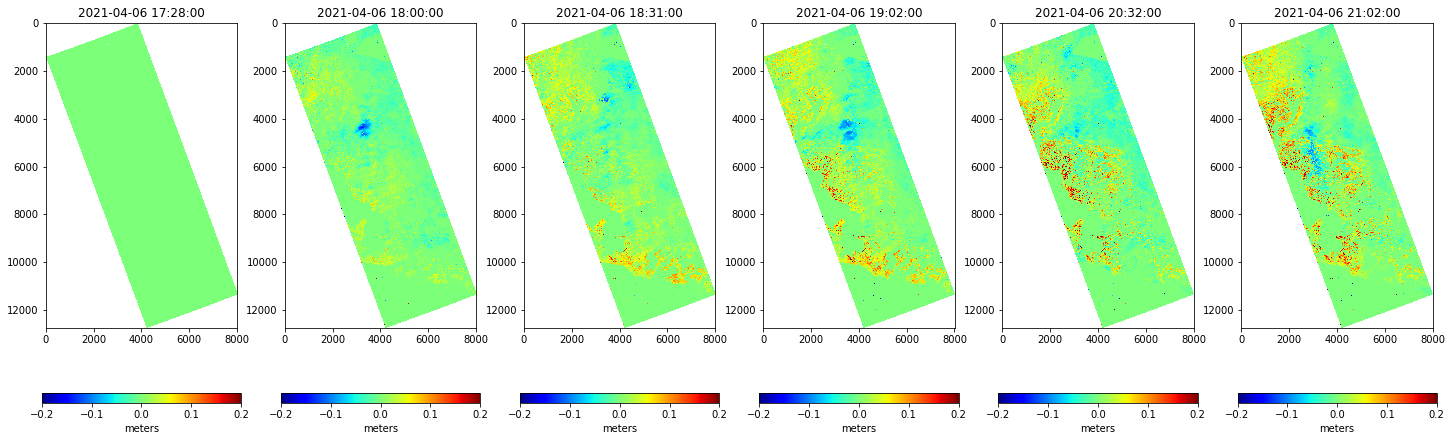

In [15]:
#### Warning!!!! do not run cell if using colab ####

## Time Steps plots for visual aid 
fig = plt.figure(figsize=(25, 8))
for date in dt_list:
    i = dt_list.index(date)
    ax = fig.add_subplot(1, 6, i+1)
    cax = ax.imshow(insar_ts[i, :, :], vmin = -0.2, vmax = 0.2, cmap = 'jet', interpolation='nearest')
    ax.set_title(dt_list[i])
    cbar = fig.colorbar(cax, orientation='horizontal')
    cbar.set_label('meters', rotation=0)

plt.show()
plt.close("all")

### Define geo corners

In [ ]:
## Define geo corners and use them to plot in lat lon
geo_corners = (ulx, lrx, lry, uly)

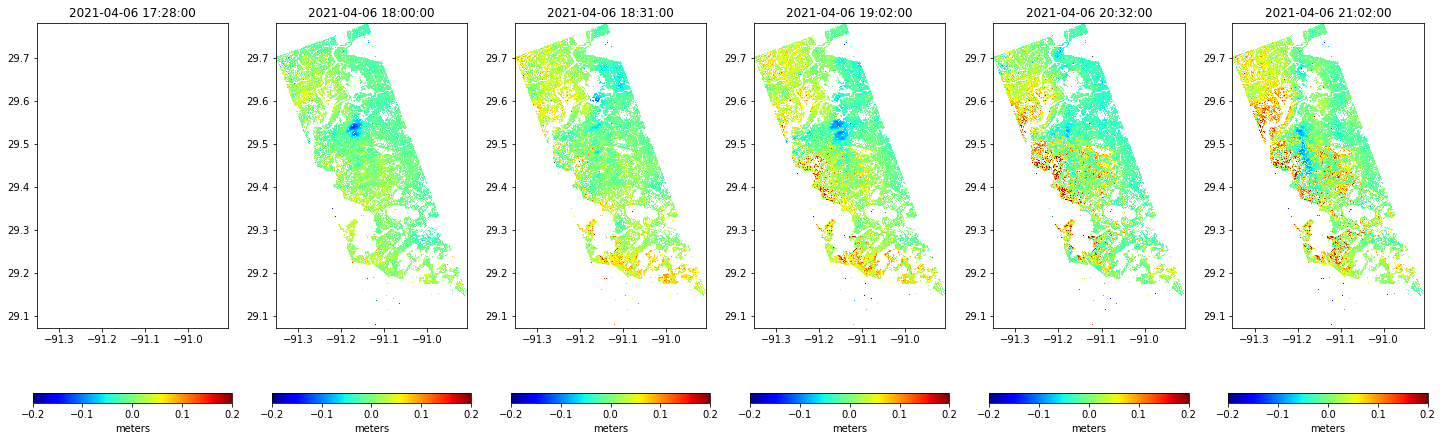

In [16]:
#### Warning!!!! do not run cell if using colab ####

## Time Steps plots using the geo corners previosly extracted 

fig = plt.figure(figsize=(25, 8))
for date in dt_list:
    i = dt_list.index(date)
    ax = fig.add_subplot(1, 6, i+1)
    cax = ax.imshow( np.ma.masked_where(insar_ts[i, :, :] == 0, insar_ts[i, :, :]), 
                    extent=geo_corners, vmin = -0.2, vmax = 0.2, cmap = 'jet', interpolation='nearest')
    ax.set_title(dt_list[i])
    cbar = fig.colorbar(cax, orientation='horizontal')
    cbar.set_label('meters', rotation=0)
    
plt.show()
plt.close("all")

### 4. Inspect temporal coherence.
Temporal coherence map allow us to map regions that presented errors when quantifying change within the interferograms used to generate the water level change time steps. This map is generated as explained by Pepe and Lanari, 2006.

Pixel values with temporal coherence near 1 correspond to pixels with reliable estimations of change as captured by the interferograms. Low values of temporal coherence correspond to pixels with poor estimations of change in the interferograms.


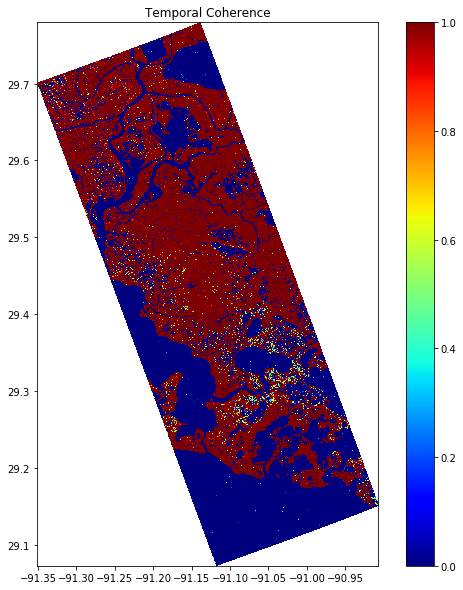

In [17]:
## 4. Inspect temporal coherence.
## Generate plot

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
cax = ax.imshow(tcoh, cmap = 'jet', extent=geo_corners, interpolation='nearest')
ax.set_title("Temporal Coherence")
cbar = fig.colorbar(cax, orientation='vertical')

plt.show()
plt.close("all")

### NOTE: Both the InSAR time steps and the temporal coherence can also accessed using QGIS, ESRI ArcGIS and/or any other GIS software with similar raster capabilities.
    
<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Forwarding" src="images/l3_qgis1.png" width="500">
    <br>
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="Routing" src="images/l3_qgis2.png" width="500">
    <br>
  </p> 
</td>
</tr></table>

### 5. Mask InSAR time steps using temporal coherence.

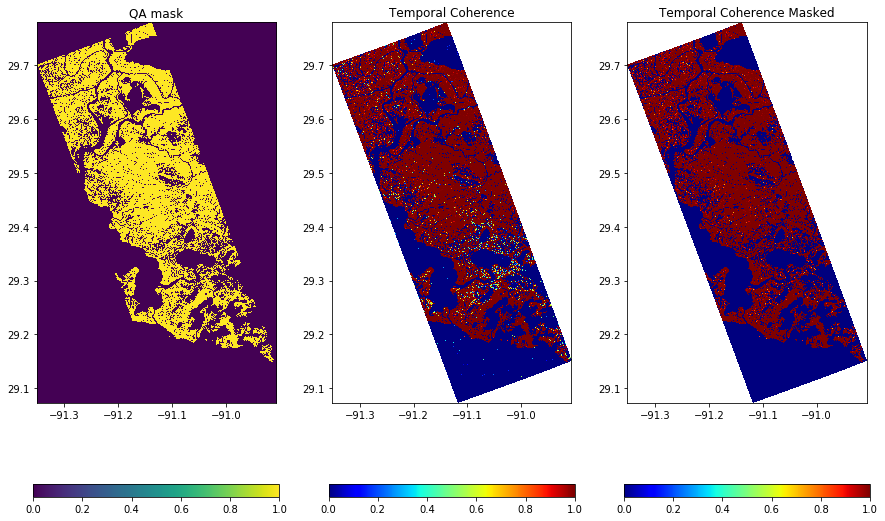

In [18]:
## 5. Mask InSAR time steps using temporal coherence.
np.warnings.filterwarnings('ignore') # This removes warning from NaNs
qa_msk = (tcoh >= 0.7).astype(np.int)
tcoh_msk = tcoh*qa_msk

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,3,1) # subplot
cax=ax.imshow(qa_msk, cmap='viridis', interpolation='nearest', extent=geo_corners)
ax.set_title(r'QA mask')
cbar = fig.colorbar(cax, orientation='horizontal')
ax = fig.add_subplot(1,3,2) # subplot
cax=ax.imshow(tcoh, cmap='jet', interpolation='nearest', extent=geo_corners)
ax.set_title(r'Temporal Coherence')
cbar = fig.colorbar(cax, orientation='horizontal')
ax = fig.add_subplot(1,3,3) # subplot
cax=ax.imshow(tcoh_msk, cmap='jet', interpolation='nearest', extent=geo_corners)
ax.set_title(r'Temporal Coherence Masked')
cbar = fig.colorbar(cax, orientation='horizontal')

plt.show()
plt.close("all")

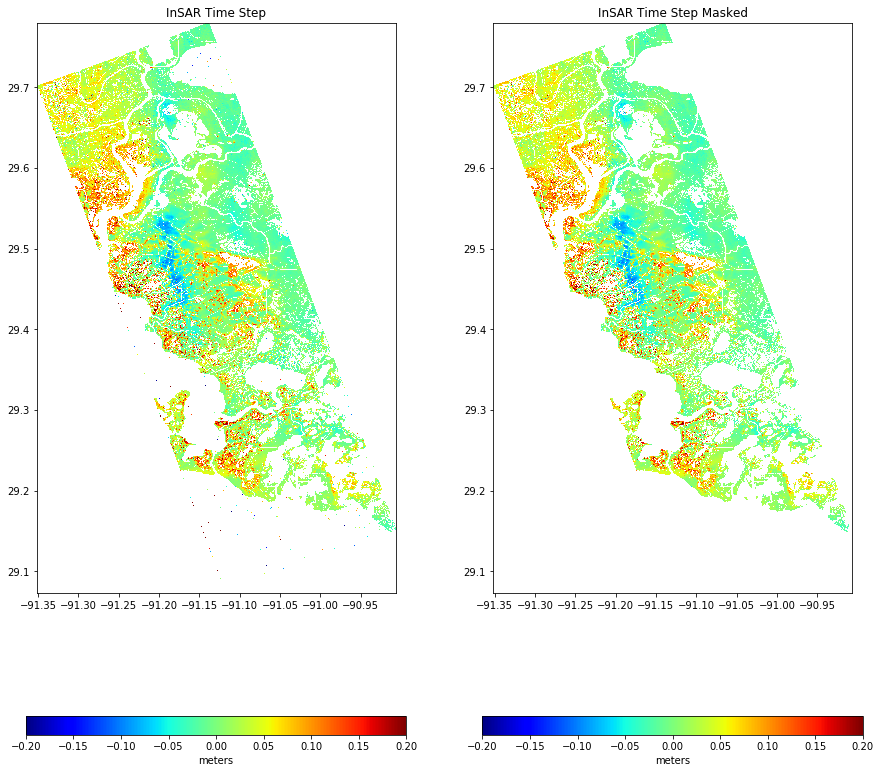

In [19]:
#### Warning!!!! do not run cell if using colab ####

## Mask InSAR time steps 

# Plot insar before qa mask
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1,2,1) # subplot
cax=ax.imshow(np.ma.masked_where(insar_ts[5, :, :] == 0, insar_ts[5, :, :]), 
              cmap='jet', interpolation='nearest', extent=geo_corners, vmin = -0.2, vmax = 0.2)
ax.set_title(r'InSAR Time Step')
cbar = fig.colorbar(cax, orientation='horizontal')
cbar.set_label('meters', rotation=0)

# Apply mask qa
insar_ts = insar_ts * qa_msk

# Plot insar after qa mask
ax = fig.add_subplot(1,2,2) # subplot
cax=ax.imshow(np.ma.masked_where(insar_ts[5, :, :] == 0, insar_ts[5, :, :]), 
              cmap='jet', interpolation='nearest', extent=geo_corners, vmin = -0.2, vmax = 0.2)
ax.set_title(r'InSAR Time Step Masked')
cbar = fig.colorbar(cax, orientation='horizontal')
cbar.set_label('meters', rotation=0)

plt.show()
plt.close("all")

### 6. Generate InSAR water level profile.

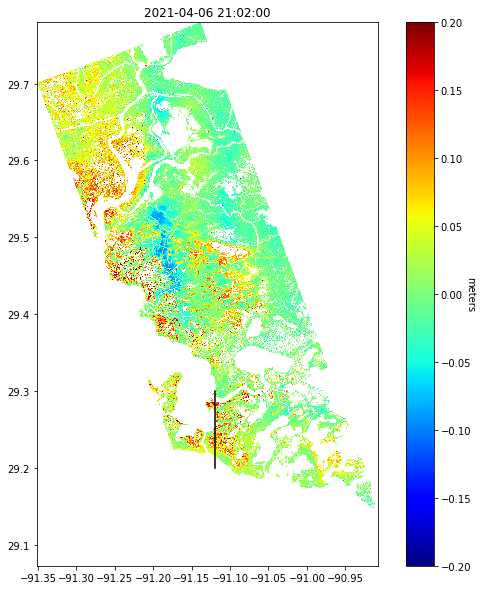

In [20]:
## 6. Generate InSAR water level profile.

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
cax = ax.imshow( np.ma.masked_where(insar_ts[5, :, :] == 0, insar_ts[5, :, :]), 
                extent=geo_corners, vmin = -0.2, vmax = 0.2, cmap = 'jet', interpolation='nearest')
ax.plot([-91.12, -91.12],[29.3, 29.2],'-k')
ax.set_title(dt_list[5])
cbar = fig.colorbar(cax, orientation='vertical')
cbar.set_label('meters', rotation=270)

plt.show()
plt.close("all")

In [21]:
## Function to extrat pixel coordinates from lat lon

def get_pixel_coord(lon, lat):
    pixel_coord_x = int((lon - ulx)/xres) 
    pixel_coord_y = int((lat - uly)/yres)
    
    return pixel_coord_x, pixel_coord_y


In [22]:
## Use the funtion to trasform the needed coordinates for our profile

pc_x1, pc_y1 = get_pixel_coord(-91.12, 29.3)
print('Raster pixel coords x, y = ', pc_x1, pc_y1)

pc_x2, pc_y2 = get_pixel_coord(-91.12, 29.2)
print('Raster pixel coords x, y = ', pc_x2, pc_y2)


Raster pixel coords x, y =  4172 8637
Raster pixel coords x, y =  4172 10437


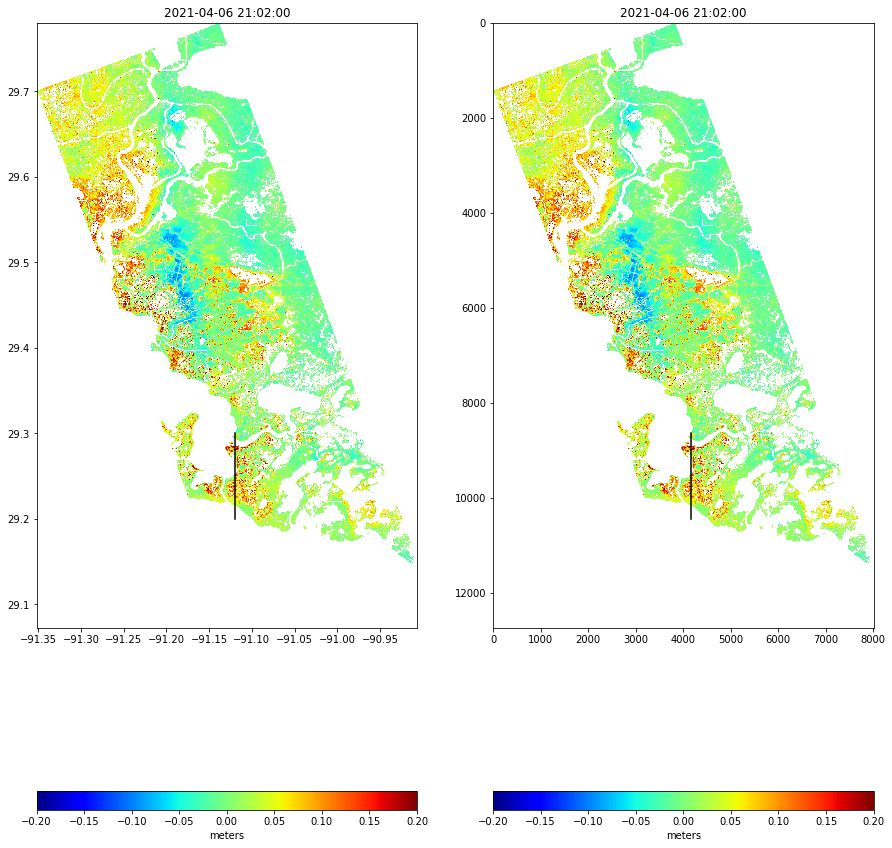

In [23]:
## Check if the coordinates are correct

fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(1,2,1) # subplot
cax=ax.imshow(np.ma.masked_where(insar_ts[5, :, :] == 0, insar_ts[5, :, :]), 
              cmap='jet', interpolation='nearest', extent=geo_corners, vmin = -0.2, vmax = 0.2)
ax.plot([-91.12, -91.12],[29.3, 29.2],'-k')
ax.set_title(dt_list[5])
cbar = fig.colorbar(cax, orientation='horizontal')
cbar.set_label('meters', rotation=0)
ax = fig.add_subplot(1,2,2) # subplot
cax=ax.imshow(np.ma.masked_where(insar_ts[5, :, :] == 0, insar_ts[5, :, :]), 
              cmap='jet', interpolation='nearest', vmin = -0.2, vmax = 0.2)
ax.plot([4172, 4172],[8637, 10437],'-k')
ax.set_title(dt_list[5])
cbar = fig.colorbar(cax, orientation='horizontal')
cbar.set_label('meters', rotation=0)

plt.show()
plt.close("all")

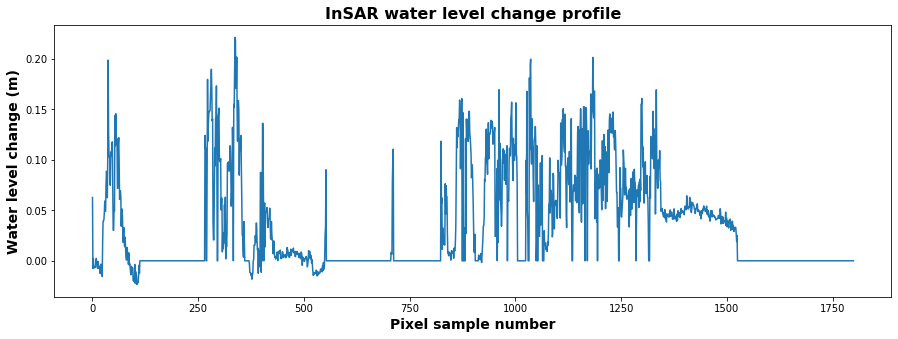

In [24]:
## Plot profile 
insar_pf = insar_ts[5, 8637:10437, 4172]

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1,1,1)
cax=ax.plot(insar_pf)
ax.set_title("InSAR water level change profile", fontweight='bold', fontsize=16)
plt.xlabel("Pixel sample number", fontweight='bold', fontsize=14)
plt.ylabel("Water level change (m)", fontweight='bold', fontsize=14)
plt.show()

plt.show()
plt.close("all")
insar_pf = None

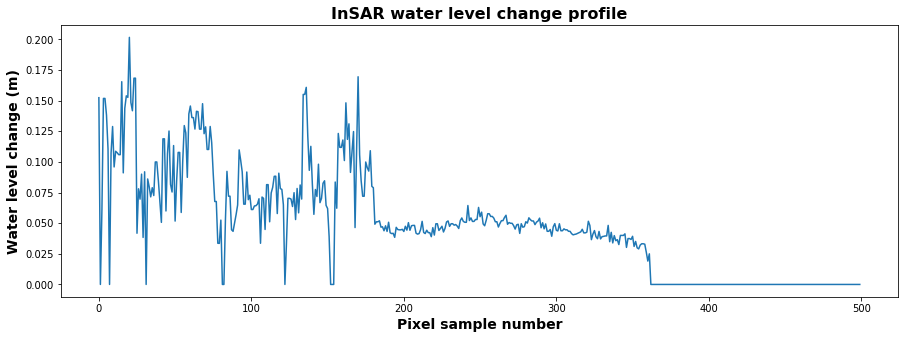

In [25]:
## Smaller profile
insar_pf = insar_ts[5, 9800:10300, 4172]

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1,1,1)
cax=ax.plot(insar_pf)
ax.set_title("InSAR water level change profile", fontweight='bold', fontsize=16)
plt.xlabel("Pixel sample number", fontweight='bold', fontsize=14)
plt.ylabel("Water level change (m)", fontweight='bold', fontsize=14)
plt.show()

plt.show()
plt.close("all")
insar_pf = None

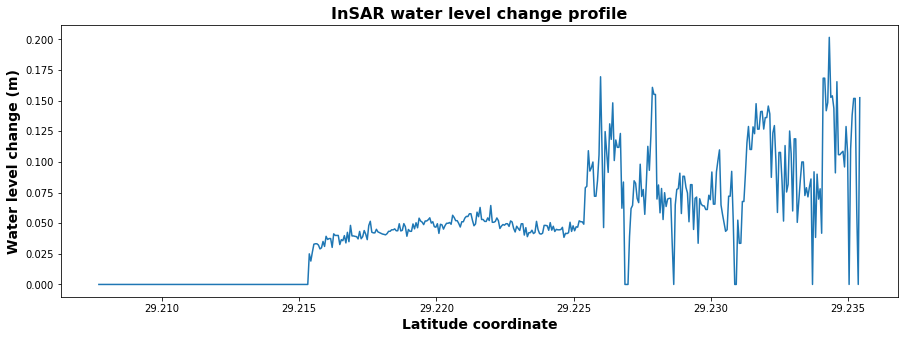

In [26]:
## We can also generate the profile plot using lat lon reference as shown below:

# Take the insar sample profile
insar_pf = insar_ts[5, 9800:10300, 4172]

# Convert it into a list
wlc = np.ndarray.tolist(insar_pf)
insar_pf = None

# Create a list of the profile pixel coordinates
pixel_nums = list(range(9800, 10300))

# Transform those pixel coordinates into lat or lon (depending the profile direction.
# In this example the pixels correspond to latitude.
lat_wlc_pf = []
for pix in pixel_nums:
    lat = uly + (pix * yres)
    lat_wlc_pf.append(lat)
    lat = None
pixel_nums = None
    
# Generate plot
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1,1,1)
cax=ax.plot(lat_wlc_pf, wlc)
ax.set_title("InSAR water level change profile", fontweight='bold', fontsize=16)
plt.xlabel("Latitude coordinate", fontweight='bold', fontsize=14)
plt.ylabel("Water level change (m)", fontweight='bold', fontsize=14)
plt.show()

plt.show()
plt.close("all")
wlc = None; lat_wlc_pf = None

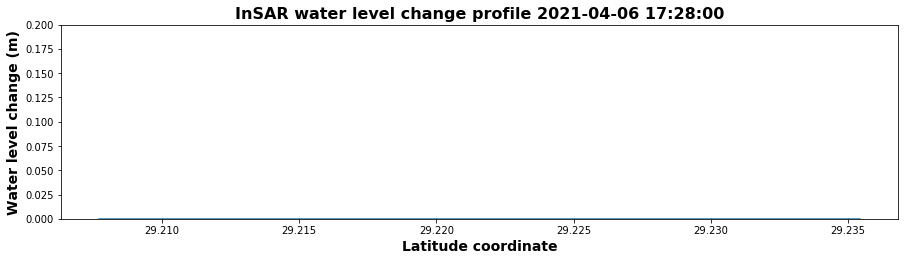

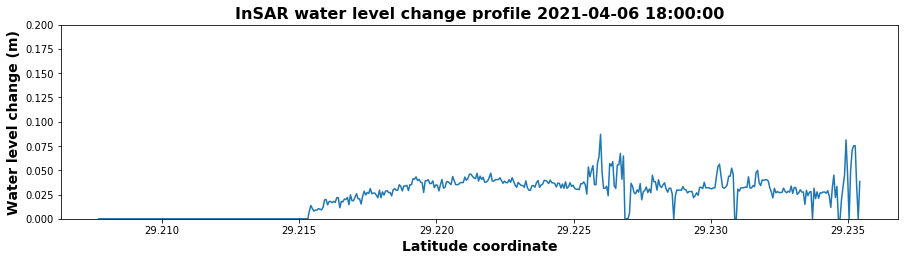

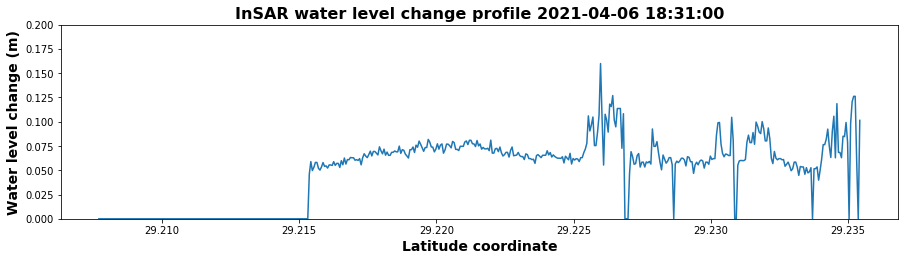

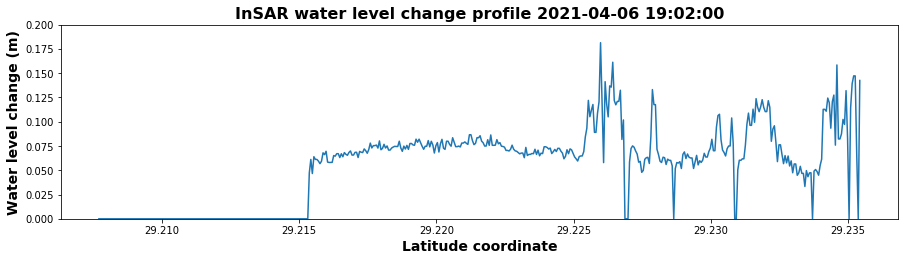

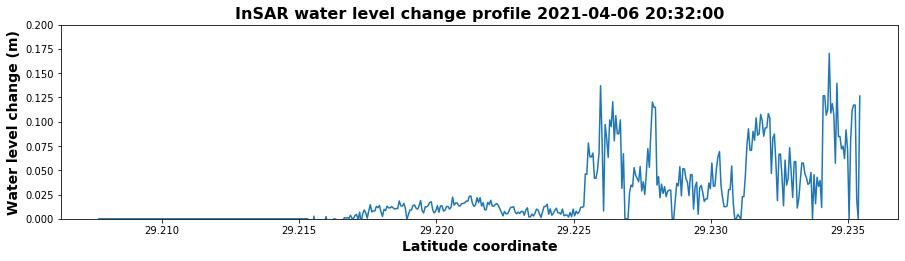

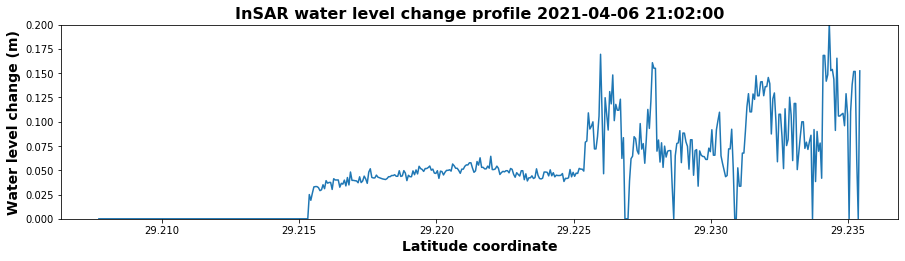

In [27]:
## Finally we can generate the profiles for all the time steps.

for date in dt_list:
    i = dt_list.index(date)
    # Take the insar sample profile
    insar_pf = insar_ts[i, 9800:10300, 4172]

    # Convert it into a list
    wlc = np.ndarray.tolist(insar_pf)
    insar_pf = None

    # Create a list of the profile pixel coordinates
    pixel_nums = list(range(9800, 10300))

    # Transform those pixel coordinates into lat or lon (depending the profile direction.
    # In this example the pixels correspond to latitude.
    lat_wlc_pf = []
    for pix in pixel_nums:
        lat = uly + (pix * yres)
        lat_wlc_pf.append(lat)
        lat = None
    pixel_nums = None

    # Generate plot
    fig = plt.figure(figsize=(15, 25))
    ax = fig.add_subplot(6,1,i+1)
    cax=ax.plot(lat_wlc_pf, wlc)
    ax.set_title('InSAR water level change profile {}'.format(dt_list[i]), fontweight='bold', fontsize=16)
    plt.ylim([0, .20]) # For visual aid 
    plt.xlabel("Latitude coordinate", fontweight='bold', fontsize=14)
    plt.ylabel("Water level change (m)", fontweight='bold', fontsize=14)
    wlc = None; lat_wlc_pf = None
plt.show()
plt.close("all")

### 7. Extract InSAR data sample using a window search.

In [28]:
## 7. Extract InSAR data sample.

# Note: Sample size in this exercise is measured from a center coordinate. 
# Thus, the sample size will be used from a center coordinate to the left, right, up and down. 
# For example a sample size of 4 will provide a sample of size 8x8 = 64 pixels total.

# insar sample size
insar_ss = 500

# Center coordinates lon, lat
# We use the following for the example: lon= -91.12 lat= 29.25 
# Use the funtion to trasform the needed coordinates for our profile into pixel coordinates
sample_coord_x, sample_coord_y = get_pixel_coord(-91.12, 29.25)
print('Raster pixel coords x, y = ', sample_coord_x, sample_coord_y)


Raster pixel coords x, y =  4172 9537


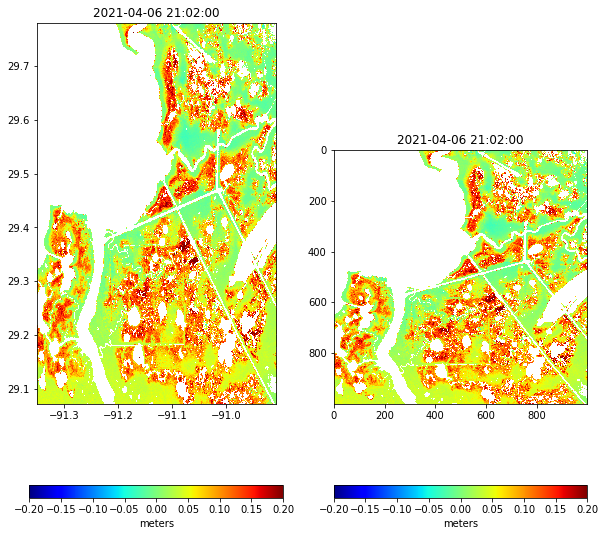

In [29]:
## Extract sample
insar_sample = insar_ts[5, sample_coord_y - insar_ss: sample_coord_y + insar_ss, 
                        sample_coord_x - insar_ss:sample_coord_x + insar_ss]

# Plot the InSAR sample
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,2,1)
cax = ax.imshow( np.ma.masked_where(insar_sample[ :, :] == 0, insar_sample[ :, :]), 
                extent=geo_corners, vmin = -0.2, vmax = 0.2, cmap = 'jet', interpolation='nearest')
ax.set_title(dt_list[5])
cbar = fig.colorbar(cax, orientation='horizontal')
cbar.set_label('meters', rotation=0)
ax = fig.add_subplot(1,2,2)
cax = ax.imshow( np.ma.masked_where(insar_sample[ :, :] == 0, insar_sample[ :, :]), 
                vmin = -0.2, vmax = 0.2, cmap = 'jet', interpolation='nearest')
ax.set_title(dt_list[5])
cbar = fig.colorbar(cax, orientation='horizontal')
cbar.set_label('meters', rotation=0)

plt.show()
plt.close("all")
insar_sample = None; sample_coord_x = None; sample_coord_y = None

Raster pixel coords x, y =  4172 9537


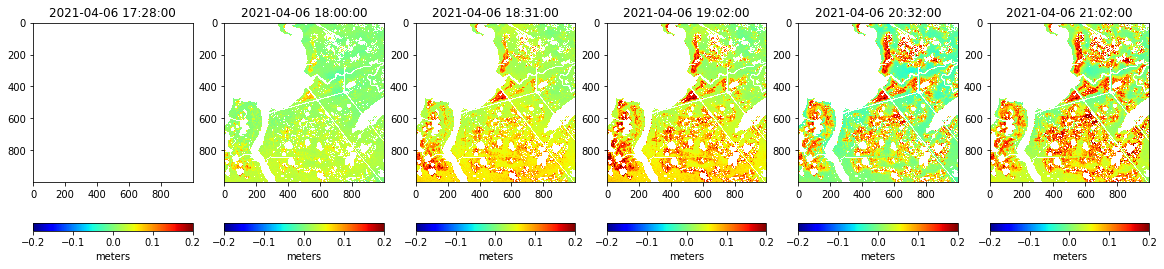

In [30]:
## Generate a sample for each InSAR time step.

# insar sample size
insar_ss = 500

# Center coordinates lon, lat
sample_coord_x, sample_coord_y = get_pixel_coord(-91.12, 29.25)
print('Raster pixel coords x, y = ', sample_coord_x, sample_coord_y)

# create figure
fig = plt.figure(figsize=(20, 5))

# Loop over the time steps
for date in dt_list:
    i = dt_list.index(date)
    ## Extract sample
    insar_sample = insar_ts[i, sample_coord_y - insar_ss: sample_coord_y + insar_ss, 
                            sample_coord_x - insar_ss:sample_coord_x + insar_ss]
    # Plot the InSAR sample
    ax = fig.add_subplot(1,6,i+1)
    cax = ax.imshow( np.ma.masked_where(insar_sample[ :, :] == 0, insar_sample[ :, :]), 
                    vmin = -0.2, vmax = 0.2, cmap = 'jet', interpolation='nearest')
    ax.set_title(dt_list[i])
    cbar = fig.colorbar(cax, orientation='horizontal')
    cbar.set_label('meters', rotation=0)

plt.show()
plt.close("all")
insar_sample = None; sample_coord_x = None; sample_coord_y = None

Raster pixel coords x, y =  4172 9537


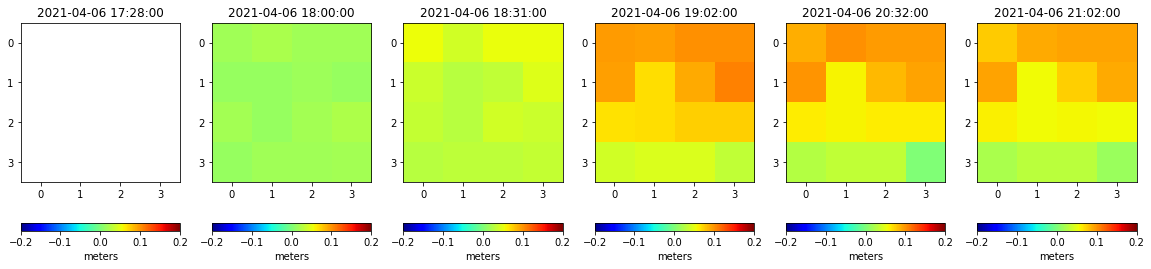

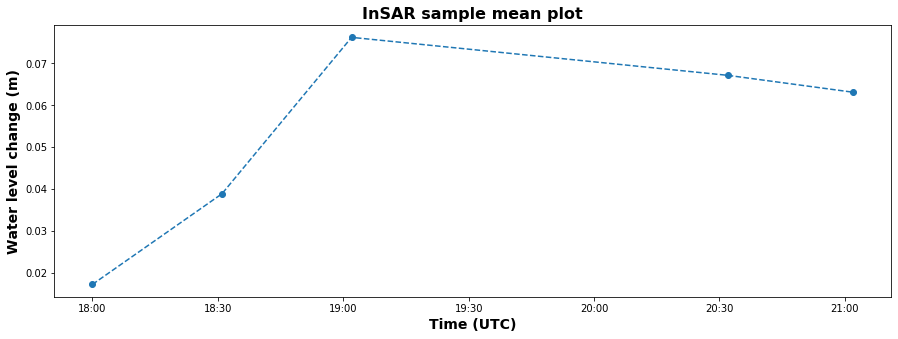

In [31]:
## Estimate the average from a sample region.

# insar sample size
insar_ss = 2

# Center coordinates lon, lat
sample_coord_x, sample_coord_y = get_pixel_coord(-91.12, 29.25)
print('Raster pixel coords x, y = ', sample_coord_x, sample_coord_y)

# List to store mean values
insar_sample_means = []

# create figure
fig = plt.figure(figsize=(20, 5))

# Loop over the time steps
for date in dt_list:
    i = dt_list.index(date)
    ## Extract sample
    insar_sample = insar_ts[i, sample_coord_y - insar_ss: sample_coord_y + insar_ss, 
                            sample_coord_x - insar_ss:sample_coord_x + insar_ss]
    # Plot the InSAR sample
    ax = fig.add_subplot(1,6,i+1)
    cax = ax.imshow( np.ma.masked_where(insar_sample[ :, :] == 0, insar_sample[ :, :]), 
                    vmin = -0.2, vmax = 0.2, cmap = 'jet', interpolation='nearest')
    ax.set_title(dt_list[i])
    cbar = fig.colorbar(cax, orientation='horizontal')
    cbar.set_label('meters', rotation=0)
    
    # Here we take the mean of the sample and store it into a list.
    insar_sample[insar_sample == 0] = np.nan
    means = np.nanmean(insar_sample)
    insar_sample_means.append(means)
plt.show()
plt.close("all")
    
# Generate plot
timef = mdates.DateFormatter('%H:%M') # Format the time for plot
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1,1,1)
cax=ax.plot(dt_list, insar_sample_means, color='tab:blue', marker='o', linestyle='dashed')
ax.set_title("InSAR sample mean plot", fontweight='bold', fontsize=16)
ax.xaxis.set_major_formatter(timef)
plt.xlabel("Time (UTC)", fontweight='bold', fontsize=14)
plt.ylabel("Water level change (m)", fontweight='bold', fontsize=14)
plt.show()
plt.close("all")   

insar_sample = None; sample_coord_x = None; sample_coord_y = None; insar_sample_means = None

### Exercise: Using the utilities shown in this notebook:
    - Generate an horizontal direction InSAR profile using pixel coordinates. 
    - Plot the same profile but now in geographic coordinates. 
        - Do not guess the location, transform the pixels coordinates to geographic.
    - Using the same profile segment, now generate the plots for all available time steps. 
    - Generate an InSAR window search for all time steps with size 200 and location of your preference. 
    - Using a mask, plot the values larger than 10cm or 0.1m. Show those values using your sample window.
    - Similarly, show the regions with water level change with change lower than 0.05m or 5cm.